<a href="https://colab.research.google.com/github/Benard-W/-Performance-Analysis/blob/main/Fake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = {
    'text': [
        "The government passed a new law to improve healthcare for all citizens.",
        "Aliens have landed in the desert and built a spaceship launchpad.",
        "Stock market hits record high after tech companies report strong earnings.",
        "Scientists discovered a potion that makes people invisible overnight.",
        "The President met with leaders to discuss climate change initiatives.",
        "A man claims he time-traveled from 2030 and brought back future tech.",
        "New vaccine reduces chances of infection by 95%, says health ministry.",
        "c.",
        "University develops AI model that detects diseases from cough sounds.",
        "Mermaid spotted on the coast of Italy, officials confirm encounter."
    ],
    'label': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df.to_excel("simulated_fake_news.xlsx", index=False)

In [ ]:
df.head()

,text,label
0,The government passed a new law to improve hea...,0
1,Aliens have landed in the desert and built a s...,1
2,Stock market hits record high after tech compa...,0
3,Scientists discovered a potion that makes peop...,1
4,The President met with leaders to discuss clim...,0


In [ ]:
df.describe()

,label
count,10.000000
mean,0.500000
std,0.527046
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
df.isnull()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:

# Create basic numeric features from text
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df['avg_word_length'] = df['char_count'] / df['word_count']

In [ ]:

# Optional: rename label for readability
df['label'] = df['label'].map({0: 'Real', 1: 'Fake'})

In [ ]:
# Convert label back to numeric for correlation
df['label_num'] = df['label'].map({'Real': 0, 'Fake': 1})

In [ ]:
# Correlation matrix
corr_matrix = df[['word_count', 'char_count', 'avg_word_length', 'label_num']].corr()

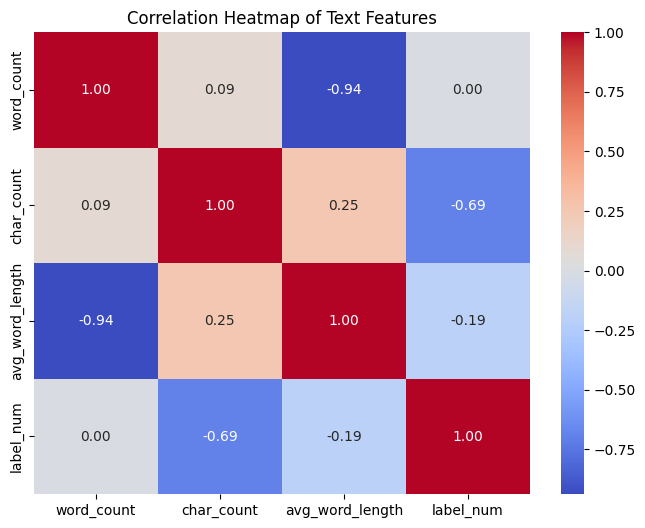

In [ ]:

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Text Features')
plt.show()

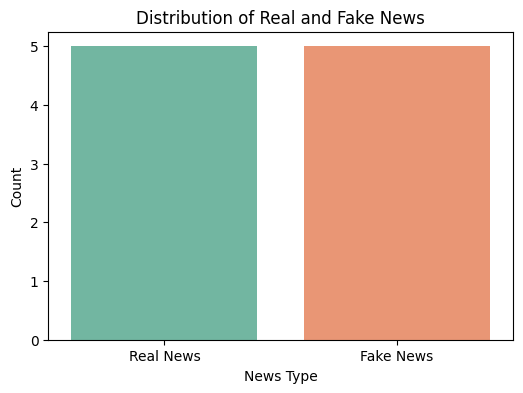

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.xticks([0, 1], ['Real News', 'Fake News'])
plt.title('Distribution of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


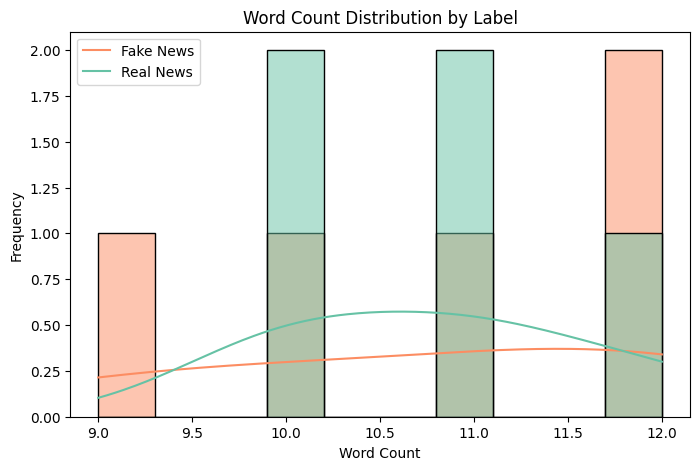

In [ ]:
# Add a column for word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='word_count', hue='label', bins=10, kde=True, palette='Set2')
plt.title('Word Count Distribution by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(labels=['Fake News', 'Real News'])
plt.show()


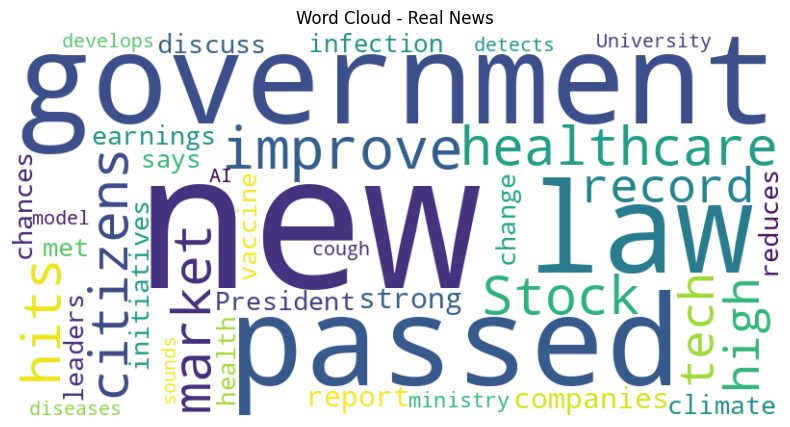

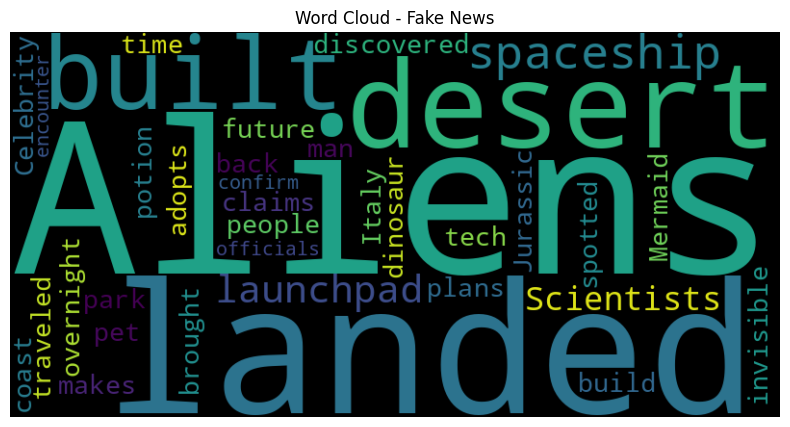

In [ ]:
# Separate text by class
real_text = ' '.join(df[df['label'] == 0]['text'])
fake_text = ' '.join(df[df['label'] == 1]['text'])

# Word Cloud - Real News
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Real News')
plt.show()

# Word Cloud - Fake News
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Fake News')
plt.show()


In [ ]:
# Features and target
X = df['text']
y = df['label']  # 0 = Real, 1 = Fake

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = vectorizer.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

        Real       0.50      1.00      0.67         1
        Fake       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



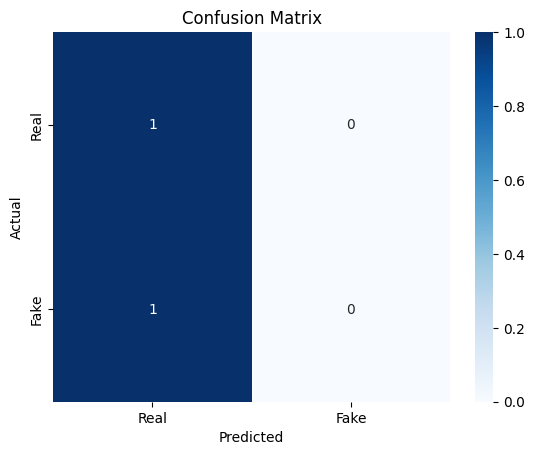

In [ ]:
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Real", "Fake"]))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(model, 'fake_news_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib

# Load the saved model and vectorizer
model = joblib.load("fake_news_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Streamlit page config
st.set_page_config(page_title="Fake News Detection", layout="centered")
st.title("📰 Fake News Detection App")
st.markdown("Enter a news article or headline to determine if it's likely **Fake** or **Real**.")

# Input box
text_input = st.text_area("News Text", height=250)

# Predict button
if st.button("Analyze"):
    if text_input.strip() == "":
        st.warning("⚠️ Please enter some text to analyze.")
    else:
        vectorized = vectorizer.transform([text_input])
        prediction = model.predict(vectorized)[0]
        label = "🚨 Fake News" if prediction == 1 else "✅ Real News"
        st.success(f"**Prediction:** {label}")


Writing app.py


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fake_news_model.pkl to fake_news_model (1).pkl


In [ ]:
!ngrok authtoken 2vl8xQXPu1pGsk6VPCb17CbSAdP_3pNdjReMEbzMurzudF5SD
from pyngrok import ngrok
import os
import time
sleep = time.sleep(5)


!pkill streamlit

# Create a tunnel to the default Streamlit port (8501)
public_url = ngrok.connect(addr=8501)
print("🌐 Streamlit app is live at:", public_url)

# Run the Streamlit app
!streamlit run app.py &
sleep.time(5)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Streamlit app is live at: NgrokTunnel: "https://b1a3-130-211-224-255.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://130.211.224.255:8501

